In [ ]:
!pip install tensorflow==2.4.0

In [ ]:
import tensorflow as tf

tf.__version__

In [35]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Conv2D, AvgPool2D, Activation, Flatten, MaxPool2D, Dropout



class CNN_networks():
    def __init__(self, shape):
        super().__init__()
        self.height, self.width, self.channel = shape


    def LeNet(self):
        model = keras.models.Sequential()

        model.add(Conv2D(filters=6, kernel_size=5, strides=1,
                         input_shape = [self.height, self.width, self.channel],
                         padding = "same",
                         activation='tanh'))
        # shape = (32, 32, 6)
        model.add(AvgPool2D(pool_size=2, strides = 2))
        model.add(Activation('tanh'))
        # shape = (16, 16, 6)

        model.add(Conv2D(filters=16, kernel_size=5, strides=1,
                         activation='tanh'))
        # shape = (12, 12, 16)
        model.add(AvgPool2D(pool_size=2, strides = 2))
        model.add(Activation('tanh'))
        # shape = (6, 6, 16)

        model.add(Conv2D(filters=120, kernel_size = 5, 
                         strides=1, activation= 'tanh'))
        # shape = (2, 2, 120)

        # Flatten the input for fully connected layers
        model.add(Flatten())

        # fully connected layer
        model.add(Dense(units = 84, activation='tanh'))

        # output layer instead of RBF, I used softmax
        model.add(Dense(units=43, activation='softmax'))

        return model


    def CustomNet(self):
        model = keras.models.Sequential()

        model.add(Conv2D(filters=32, kernel_size=7, strides=1,
                         input_shape = (self.height, self.width, self.channel),
                         padding = "same",
                         activation='relu'))
        # shape = (32, 32, 64)
        model.add(Conv2D(filters=64, kernel_size=3, strides=1,
                         padding = "same",
                         activation='relu'))
        # shape = (32, 32, 128)
        model.add(MaxPool2D(pool_size=2, strides = 1))
        # shape = (31, 31, 128)

        # Flatten the input for fully connected layers
        model.add(Flatten())

        # fully connected layer 2
        model.add(Dense(units=64, activation='relu'))
        model.add(Dropout(0.05))

        # output layer
        model.add(Dense(units=43, activation='softmax'))

        #compile
        # opt = keras.optimizers.Adam(learning_rate=0.02)
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

        return model


    def GoogleNet(self):
        pass

# shape = (5, 32, 32, 3)
# n = CNN_networks(shape[1:])
# model = n.CustomNet()
# x =  tf.random.normal(shape)
# # x = np.random.uniform(shape)
# y = np.array([4, 2, 3, 1, 0])
# y = keras.utils.to_categorical(y, num_classes=43)
# print(x.shape)
# print(y.shape)

In [36]:
# https://www.kaggle.com/valentynsichkar/traffic-signs-classification-with-cnn/data?select=datasets_preparing.py

import numpy as np
import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from tensorflow import keras



def load_data(file):
    file_path = '/content/drive/MyDrive/traffic_sign/input/'+str(file)
    with open(file_path, 'rb') as f:
        d = pkl.load(f, encoding = 'latin1')
        x = d['features'].astype(np.float32)
        y = d['labels']
        c = d['coords']
        s = d['sizes']

    return x, y, s, c


def normalize_data(data):
    data = data/255.0

    return data


def labelname_list(file):
    file_path = '/content/drive/MyDrive/traffic_sign/input/'+str(file)
    labels = pd.read_csv(file_path)
    label_list = []
    # print(len(labels))
    for row in range(len(labels)):
        label_list.append(labels['SignName'][row])
    
    return label_list

# load training data
x_train, y_train, s_train, c_train = load_data('train.pickle')

# load validation data
x_valid, y_valid, s_valid, c_valid = load_data('valid.pickle')

# load test data
x_test, y_test, s_test, c_test = load_data('test.pickle')

# normailize features from train, valid, and test
x_train, x_valid, x_test = map(normalize_data, [x_train, x_valid, x_test])

# shuffle 
x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_valid, y_valid = shuffle(x_valid, y_valid, random_state=0)
x_test, y_test = shuffle(x_test, y_test, random_state=0)

# to categorical
y_train = keras.utils.to_categorical(y_train, num_classes=43)
y_valid = keras.utils.to_categorical(y_valid, num_classes=43)
y_test = keras.utils.to_categorical(y_test, num_classes=43)

# label name list
label_list = labelname_list('label_names.csv')

def show_image(x, y):
    plt.figure()
    plt.imshow(x)
    plt.title(label_list[np.argmax(y)])
    plt.show()

def train():
  epochs = 10

  print(x_train.shape[1:])
  net = CNN_networks(x_train.shape[1:])
  model = net.CustomNet()
  model.summary()
  hist = model.fit(x_train, y_train, epochs = epochs,
                   validation_data = (x_valid, y_valid),
              verbose=1)

  print('Epochs={0:d}, training accuracy={1:.5f}, validation accuracy={2:.5f}'.\
        format(epochs, max(hist.history['accuracy']), max(hist.history['val_accuracy'])))


  model.save('/content/drive/MyDrive/traffic_sign/input/model3')


# print('label_list:', len(label_list))
# print(np.mean(x_train, axis=0).shape)
# print('x_train, x_valid, x_test', type(x_train), x_valid.shape, x_test.shape)
# print('y_train:', y_train[5])
# print('s_train:', s_train.shape)
# print('c_train:', c_train.shape)

In [37]:
train()

(32, 32, 3)
Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 32, 32, 32)        4736      
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_16 (Dense)             (None, 64)                3936320   
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 43)   

In [23]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/traffic_sign/input/model3')
res = new_model.predict(x_test[5:6, :, :, :])
c = np.argmax(res)
print(c)
print(label_list[c])
# new_model.summary()

38
Keep right


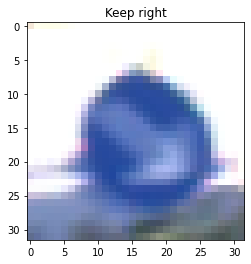

In [24]:
show_image(x_test[5, :, :, :], y_test[5])

In [ ]:
loss, acc = new_model.evaluate(x_test, y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

In [ ]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (15.0, 5.0) # Setting default size of plots
plt.rcParams['image.interpolation'] = 'nearest'

fig = plt.figure()
plt.plot(hist.history['accuracy'], '-o', linewidth=3.0)
plt.plot(hist.history['val_accuracy'], '-o', linewidth=3.0)
plt.title('Traffic Sign Classification', fontsize=22)
plt.legend(['train', 'validation'], loc='lower right', fontsize='xx-large')
plt.xlabel('Epoch', fontsize=15)
plt.ylabel('Accuracy', fontsize=15)
# plt.tick_params(labelsize=13)

# Showing the plot
plt.show()

# Saving the plot
fig.savefig('/content/drive/MyDrive/traffic_sign/figures/training_data.png')
plt.close()